<a href="https://colab.research.google.com/github/nedokormysh/GB_intro_Analysis_Healthcare/blob/lesson_2/GB_intro_Healthcare_Analysis_hw_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание.**

Задание на ознакомление с датасетом TCGA — сделать описательную статистику нескольких переменных на выбор, выяснить возможный источник выбранных признаков и взаимосвязь с целевой переменной.

Архив можно распаковать в Google Colab с помощью !tar xzf
Домашнее задание предоставляется в виде Google Colab Notebook.

In [1148]:
# !tar -xvf "/content/clinical.project-tcga-dlbc.2023-09-20.tar.gz"

In [1149]:
# !pip install phik -q

In [1150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Распакуем архив в гит и будем использовать данные уже из гита.

In [1151]:
PATH = 'https://raw.githubusercontent.com/nedokormysh/GB_intro_Analysis_Healthcare/lesson_2/datasets/'

In [1152]:
DATASETS_NAMES = ['clinical.tsv', 'exposure.tsv', 'family_history.tsv', 'follow_up.tsv', 'pathology_detail.tsv']

In [1153]:
clinical, exposure, family_history, follow_up, pathology_detail = [pd.read_csv(PATH+f'{i}', sep='\t') for i in DATASETS_NAMES]
datasets = clinical, exposure, family_history, follow_up, pathology_detail

# Общий анализ датасетов.

Посмотрим краткую информацию о датасетах.

In [1154]:
for i in range(len(datasets)):
    name = DATASETS_NAMES[i].split('.')[0]
    print(f'Датасет: \033[1m{name}\033[0m')
    print(f'Размер датасета: {datasets[i].shape}')
    print('Есть пропуски!\n') if datasets[i].isna().any().any() else print('Пропусков нет\n')
    display(datasets[i].sample(3)) if len(datasets[i]) > 0 else print('В датасете ничего нет')
    print('\n')
    if len(datasets[i]) > 0:
        display(datasets[i].nunique())

    print('-'*300)

Датасет: clinical
Размер датасета: (106, 158)
Пропусков нет



,case_id,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_residence_at_enrollment,days_to_birth,days_to_death,...,treatment_arm,treatment_dose,treatment_dose_units,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_type
57,a5b188f0-a6d3-4d4a-b04f-36d47ec05338,TCGA-FA-A4XK,TCGA-DLBC,40,'--,'--,'--,'--,-14723,708,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Pharmaceutical Therapy, NOS"
25,31bbad4e-3789-42ec-9faa-1cb86970f723,TCGA-G8-6907,TCGA-DLBC,57,'--,'--,'--,'--,-21021,595,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"
90,eda9496e-be80-4a13-bf06-89f0cc9e937f,TCGA-GS-A9TZ,TCGA-DLBC,51,'--,'--,'--,'--,-18691,'--,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"


case_id                  58
case_submitter_id        58
project_id                1
age_at_index             35
age_is_obfuscated         1
                         ..
treatment_frequency       1
treatment_intent_type     1
treatment_or_therapy      4
treatment_outcome         1
treatment_type            3
Length: 158, dtype: int64

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Датасет: exposure
Размер датасета: (48, 35)
Пропусков нет



,case_id,case_submitter_id,project_id,age_at_onset,alcohol_days_per_week,alcohol_drinks_per_day,alcohol_history,alcohol_intensity,alcohol_type,asbestos_exposure,...,smoking_frequency,time_between_waking_and_first_smoke,tobacco_smoking_onset_year,tobacco_smoking_quit_year,tobacco_smoking_status,tobacco_use_per_day,type_of_smoke_exposure,type_of_tobacco_used,weight,years_smoked
31,c3d662ee-48d0-454a-bb0c-77d3338d3747,TCGA-GR-7353,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
15,45b0cf9f-a879-417f-8f39-7770552252c0,TCGA-GS-A9TQ,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
1,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--


case_id                                   48
case_submitter_id                         48
project_id                                 1
age_at_onset                               1
alcohol_days_per_week                      1
alcohol_drinks_per_day                     1
alcohol_history                            1
alcohol_intensity                          1
alcohol_type                               1
asbestos_exposure                          1
bmi                                        1
cigarettes_per_day                         1
coal_dust_exposure                         1
environmental_tobacco_smoke_exposure       1
exposure_duration                          1
exposure_duration_years                    1
exposure_type                              1
height                                     1
marijuana_use_per_week                     1
pack_years_smoked                          1
parent_with_radiation_exposure             1
radon_exposure                             1
respirable

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Датасет: family_history
Размер датасета: (0, 9)
Пропусков нет

В датасете ничего нет


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Датасет: follow_up
Размер датасета: (0, 112)
Пропусков нет

В датасете ничего нет


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Фактически из 5 предоставленных датасетов информация есть только в двух. И достаточно много колонок с пропущенной информацией или с данными, где у нас во всех строках одна и та же информация. Для возможного построения модели эти данные нам не информативны.

Не будем рассматривать колонки, где количество уникальных значений равно 1.

In [1155]:
clinical_info_lst = [i for i in clinical.columns if clinical[i].nunique() != 1]
clinical_info = clinical[clinical_info_lst]

exposure_info_lst = [i for i in exposure.columns if exposure[i].nunique() != 1]
exposure_info = exposure[exposure_info_lst]

In [1156]:
clinical_info = clinical_info.replace("no", 'No')
clinical_info = clinical_info.replace("yes", 'Yes')
clinical_info = clinical_info.replace("'--", np.nan)
clinical_info.head(2)

,case_id,case_submitter_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,...,prior_malignancy,prior_treatment,progression_or_recurrence,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,year_of_diagnosis,treatment_or_therapy,treatment_type
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,...,No,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,Yes,"Pharmaceutical Therapy, NOS"
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,...,No,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,No,"Radiation Therapy, NOS"


In [1157]:
exposure_info.head(2)

,case_id,case_submitter_id
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1
1,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN


In [1158]:
clinical_info.duplicated().any(), exposure_info.duplicated().any()

(False, False)

Дублей у нас нет.

Объединять датасеты смысла не имеет, т.к. фактически информация из exposure совпадает с информацией из clinical. Таким образом будем работать с clinical_info.

Добавим пару новых столбцов. Они будут показывать производился ли определённый тип лечения.

In [1159]:
clinical_info.treatment_type.unique()

array(['Pharmaceutical Therapy, NOS', 'Radiation Therapy, NOS', nan],
      dtype=object)

In [1160]:
clinical_info['treatment_Radiation'] = np.nan
clinical_info['treatment_Pharmaceutical'] = np.nan

In [1161]:
def therapy_reaction(row):
    if row['treatment_type'] == 'Pharmaceutical Therapy, NOS':
        row['treatment_Pharmaceutical'] = row['treatment_or_therapy']
    elif row['treatment_type'] == 'Radiation Therapy, NOS':
        row['treatment_Radiation'] = row['treatment_or_therapy']

    return row

clinical_info = clinical_info.apply(therapy_reaction, axis=1)

case_submitter_id - это тоже некоторое id. Не будем его рассматривать. Сделаем case_id индексом и удалим строки, где информация во всех столбцах отсутствует.

In [1162]:
clinical_info = clinical_info.drop(['treatment_or_therapy',	'treatment_type', 'case_submitter_id'], axis=1)

In [1163]:
clinical_info.shape

(106, 31)

In [1164]:
clinical_info.set_index('case_id', inplace=True)
clinical_info.dropna(axis=0, how='all', inplace=True)
clinical_info.reset_index(drop=False, inplace=True )
clinical_info.shape

(96, 31)

10 строк оказались полностью пустыми и неинформативными.

In [1165]:
for i in range(0, len(clinical_info)):
    if i % 2 == 0:
        # print(clinical_info.iloc[i]['case_id'])
        clinical_info.loc[i][['treatment_Radiation', 'treatment_Pharmaceutical']] = clinical_info.loc[i][['treatment_Radiation', 'treatment_Pharmaceutical']].fillna(clinical_info.loc[i+1][['treatment_Radiation', 'treatment_Pharmaceutical']])
        # print(clinical_info.iloc[i][['treatment_Radiation', 'treatment_Pharmaceutical']])

In [1166]:
clinical_info.head(3)

,case_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,year_of_death,...,prior_malignancy,prior_treatment,progression_or_recurrence,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,year_of_diagnosis,treatment_Radiation,treatment_Pharmaceutical
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,NaN,...,No,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,No,Yes
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,NaN,...,No,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,No,NaN
2,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,NaN,...,No,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2013,No,Yes


In [1167]:
clinical_info_thinned = clinical_info.iloc[::2]
clinical_info_thinned.head(3)

,case_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,year_of_death,...,prior_malignancy,prior_treatment,progression_or_recurrence,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,year_of_diagnosis,treatment_Radiation,treatment_Pharmaceutical
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,NaN,...,No,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,No,Yes
2,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,NaN,...,No,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2013,No,Yes
4,0e251c03-bf86-4ed8-b45d-3cbc97160502,27,-10075,391,hispanic or latino,female,white,Dead,1984,2012,...,No,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2011,No,Yes


Получили прореженный датасет, без дублирующих строк. Вероятно это можно было сделать как-то более красиво с точки зрения программирования, но пока так.

# EDA

Отфильтруем колонки с единственным значением после всех преобразований.

In [1168]:
clinical_info_thinned_lst = [i for i in clinical_info_thinned.columns if clinical_info_thinned[i].nunique() != 1]
clinical_info_thinned = clinical_info_thinned[clinical_info_thinned_lst]

In [1169]:
clinical_info_thinned.columns

Index(['case_id', 'age_at_index', 'days_to_birth', 'days_to_death',
       'ethnicity', 'gender', 'race', 'vital_status', 'year_of_birth',
       'year_of_death', 'age_at_diagnosis', 'ann_arbor_b_symptoms',
       'ann_arbor_clinical_stage', 'ann_arbor_extranodal_involvement',
       'days_to_last_follow_up', 'icd_10_code', 'prior_treatment',
       'site_of_resection_or_biopsy', 'tissue_or_organ_of_origin',
       'year_of_diagnosis', 'treatment_Radiation', 'treatment_Pharmaceutical'],
      dtype='object')

In [1170]:
continuous_features = ['age_at_index', 'days_to_birth', 'days_to_death', 'year_of_birth', 'year_of_death',
                       'age_at_diagnosis', 'days_to_last_follow_up', 'year_of_diagnosis']

categorical_features = [i for i in clinical_info_thinned.columns if i not in continuous_features]

In [1171]:
# clinical_info_thinned.info()

In [1172]:
for el in continuous_features:
    clinical_info_thinned[el] = clinical_info_thinned[el].astype('float')

for el in categorical_features:
    clinical_info_thinned[el] = clinical_info_thinned[el].astype('category')

## Числовые признаки.

### Краткое описание числовых характеристик

In [1173]:
clinical_info_thinned[continuous_features].describe()

,age_at_index,days_to_birth,days_to_death,year_of_birth,year_of_death,age_at_diagnosis,days_to_last_follow_up,year_of_diagnosis
count,48.000000,48.000000,9.000000,48.000000,5.000000,48.000000,43.000000,48.000000
mean,56.270833,-20731.354167,1504.777778,1952.875000,2007.600000,20731.354167,1274.372093,2009.145833
std,13.947835,5107.471500,2129.076665,15.172238,4.929503,5107.471500,1315.464195,5.031770
min,23.000000,-30256.000000,58.000000,1923.000000,2001.000000,8493.000000,0.000000,1987.000000
25%,46.000000,-24607.750000,313.000000,1941.000000,2004.000000,16998.250000,441.500000,2009.000000
50%,57.500000,-21146.500000,595.000000,1951.500000,2009.000000,21146.500000,832.000000,2011.000000
75%,67.000000,-16998.250000,1252.000000,1963.250000,2012.000000,24607.750000,1581.000000,2012.000000
max,82.000000,-8493.000000,6425.000000,1987.000000,2012.000000,30256.000000,5980.000000,2013.000000


Каких-то явных выпадающих значений вроде бы не видно.

array([[<Axes: title={'center': 'age_at_index'}>,
        <Axes: title={'center': 'days_to_birth'}>,
        <Axes: title={'center': 'days_to_death'}>,
        <Axes: title={'center': 'year_of_birth'}>],
       [<Axes: title={'center': 'year_of_death'}>,
        <Axes: title={'center': 'age_at_diagnosis'}>,
        <Axes: title={'center': 'days_to_last_follow_up'}>,
        <Axes: title={'center': 'year_of_diagnosis'}>]], dtype=object)

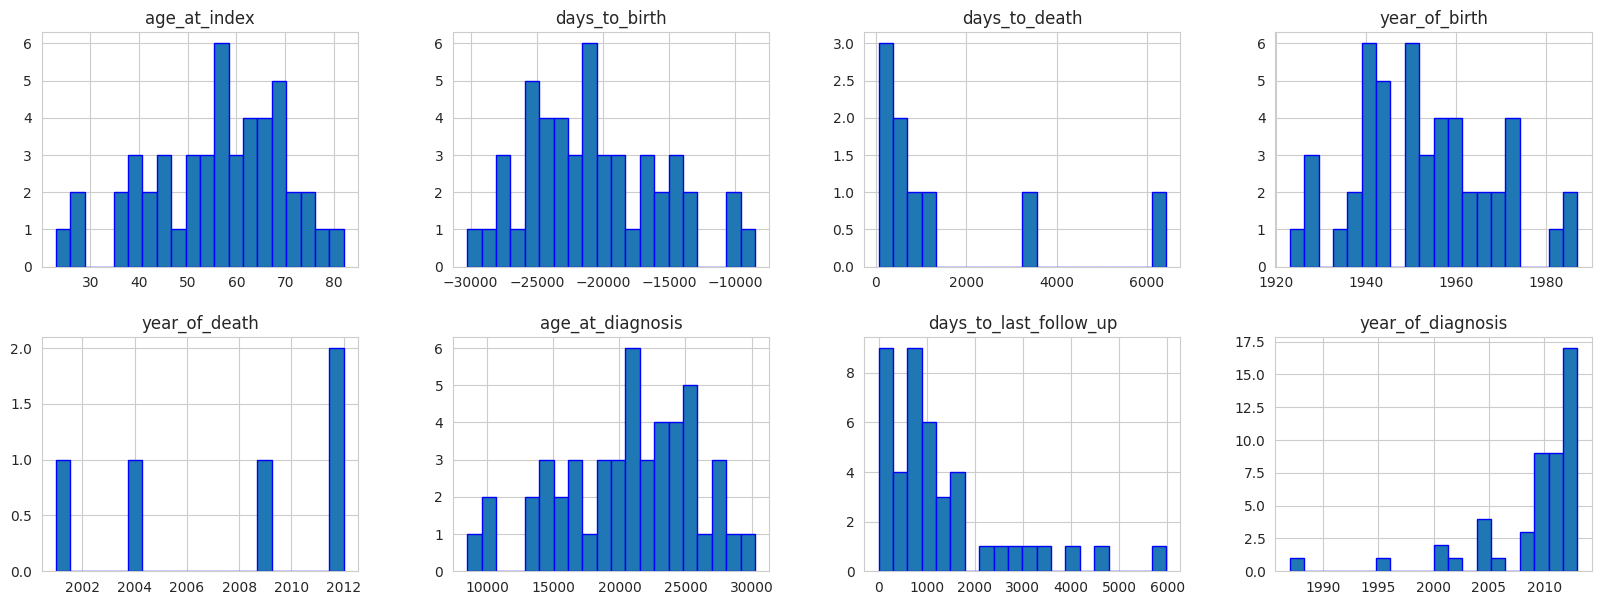

In [1174]:
clinical_info_thinned[continuous_features].hist(layout=(-1, 4), figsize=(20, 7), bins=20, edgecolor='b')

### age_at_index

Вероятно возраст в котором был поставлен диагноз и была внесена запись в индекс.

Text(0.5, 0, 'age_at_index')

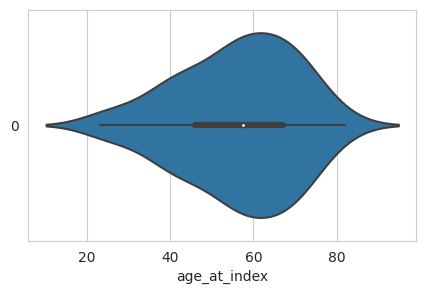

In [1175]:
plt.figure(figsize=(5,3))
sns.violinplot(clinical_info_thinned['age_at_index'], orient='h')
plt.xlabel('age_at_index')

Каких-то явных выбросов не наблюдается. Рассмотрим распределение. Также подсветим жив человек или нет. (Можно не делать, это просто исходил, что можем взять статус жив человек или нет как целевую переменную, выбрано было наугад)

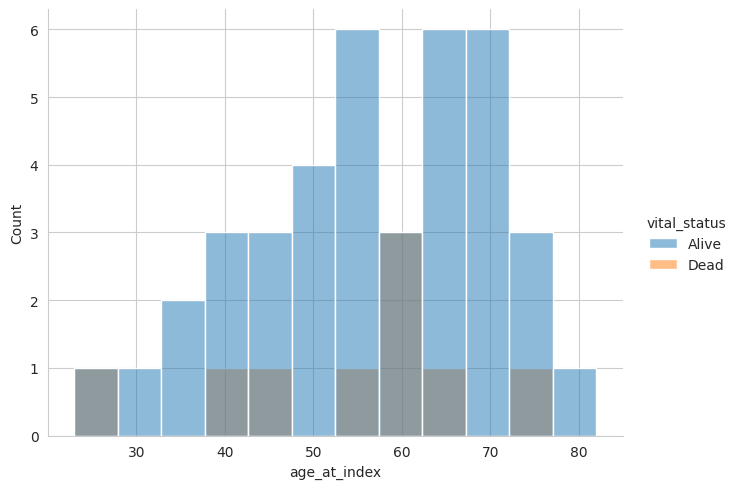

In [1176]:
sns.displot(data=clinical_info_thinned,
            x=clinical_info_thinned['age_at_index'],
            legend=True,
            aspect=1.3,
            bins=12,
            hue=clinical_info_thinned['vital_status'],
            kind='hist')

### days_to_birth

Предполагаю, что фактически это возраст в днях в момент выставления диагноза. Должна быть большая корреляция этого признака и возраста. Посмотрим позднее.

Text(0.5, 0, 'days_to_birth')

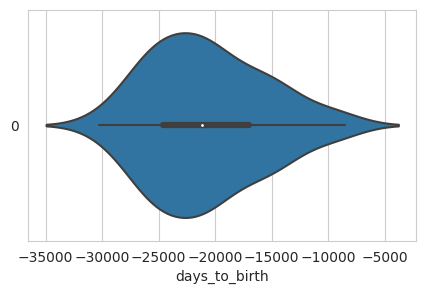

In [1177]:
plt.figure(figsize=(5,3))
sns.violinplot(clinical_info_thinned['days_to_birth'], orient='h')
plt.xlabel('days_to_birth')

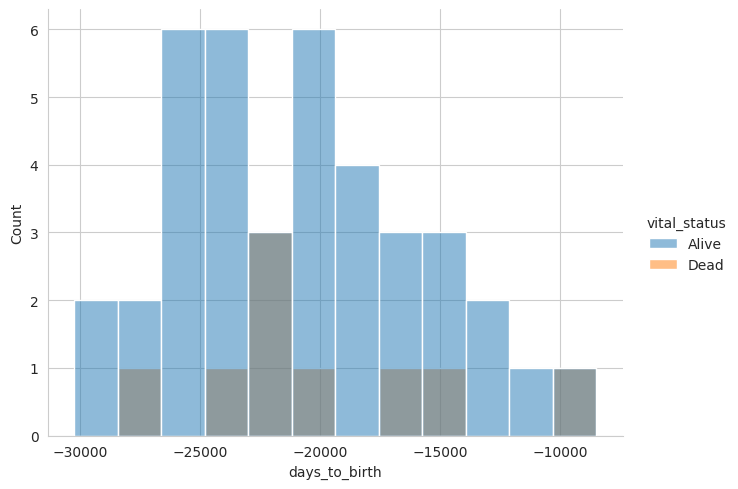

In [1178]:
sns.displot(data=clinical_info_thinned,
            x=clinical_info_thinned['days_to_birth'],
            legend=True,
            aspect=1.3,
            bins=12,
            hue=clinical_info_thinned['vital_status'],
            kind='hist')

In [1179]:
print(f'\033[1mКоэффициент корреляции\033[0m  = ', np.corrcoef(clinical_info_thinned['days_to_birth'], clinical_info_thinned['age_at_index'])[0][1])

Коэффициент корреляции  =  -0.9998391198814849


Да, имеем большую корреляцию. Для обучения модели один из признаков можно удалить.

### days_to_death

Text(0.5, 0, 'days_to_death')

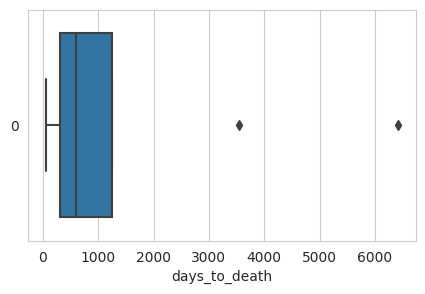

In [1180]:
plt.figure(figsize=(5,3))
sns.boxplot(clinical_info_thinned['days_to_death'], orient='h')
plt.xlabel('days_to_death')

Здесь наблюдаются люди с очень сильными отклонениями по количеству дней до смерти.

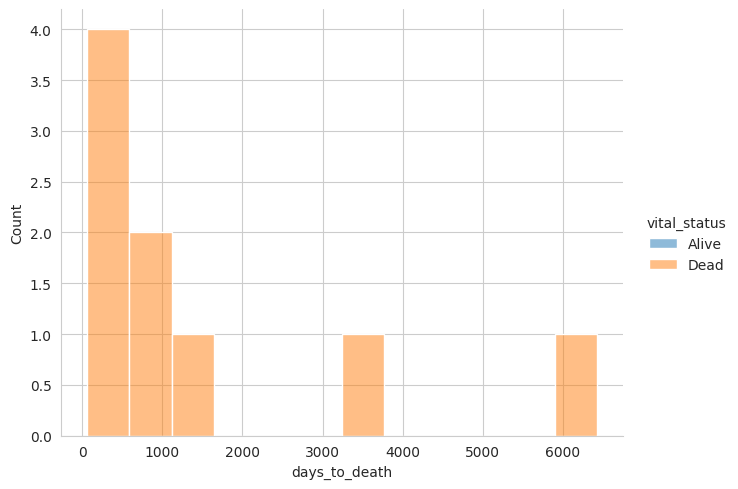

In [1181]:
sns.displot(data=clinical_info_thinned,
            x=clinical_info_thinned['days_to_death'],
            legend=True,
            aspect=1.3,
            bins=12,
            hue=clinical_info_thinned['vital_status'],
            kind='hist')

Как и предполагалось, что данный признак будет отражать только тех, кто умер.

### year_of_birth

Text(0.5, 0, 'year_of_birth')

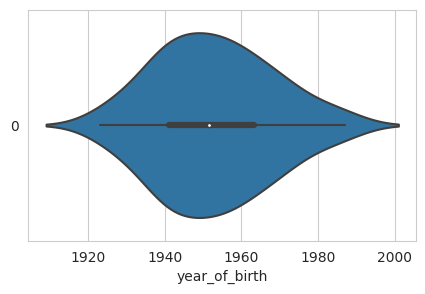

In [1182]:
plt.figure(figsize=(5,3))
sns.violinplot(clinical_info_thinned['year_of_birth'], orient='h')
plt.xlabel('year_of_birth')

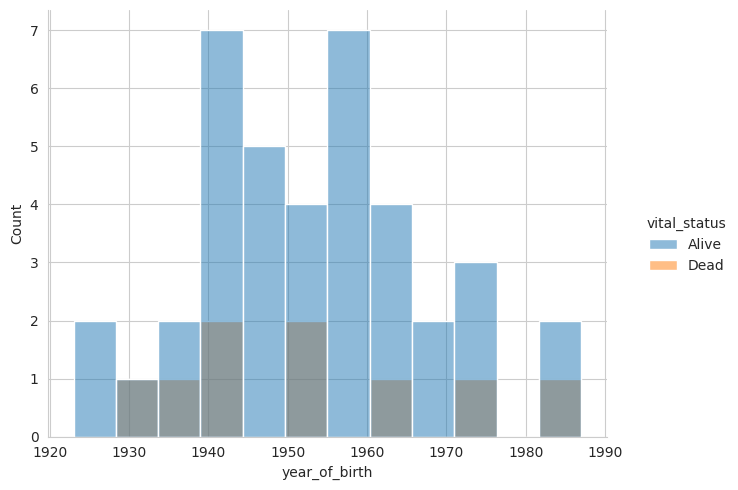

In [1183]:
sns.displot(data=clinical_info_thinned,
            x=clinical_info_thinned['year_of_birth'],
            legend=True,
            aspect=1.3,
            bins=12,
            hue=clinical_info_thinned['vital_status'],
            kind='hist')

In [1184]:
# clinical_info_thinned['year_of_birth'].value_counts()

### year_of_death

Text(0.5, 0, 'year_of_death')

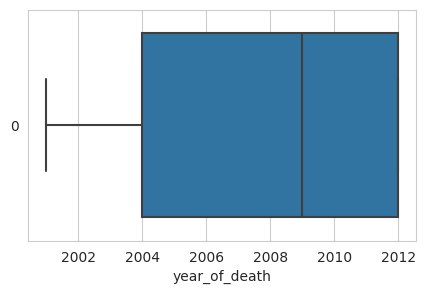

In [1185]:
plt.figure(figsize=(5,3))
sns.boxplot(clinical_info_thinned['year_of_death'], orient='h')
plt.xlabel('year_of_death')

In [1186]:
clinical_info_thinned['year_of_death'].unique()

array([  nan, 2012., 2001., 2004., 2009.])

По большей части год смерти нам неизвестен. Если бы строил модель, то думаю, что данный признак нужно было бы удалять.

### age_at_diagnosis

Не знаю, чем этот признак отличается от признака age_at_index. Возможно это возраст именно постановки диагноза. А age_at_index - это признак попадания в базу. Но думаю, что они должны быть сильно скоррелированы.

Text(0.5, 0, 'age_at_diagnosis')

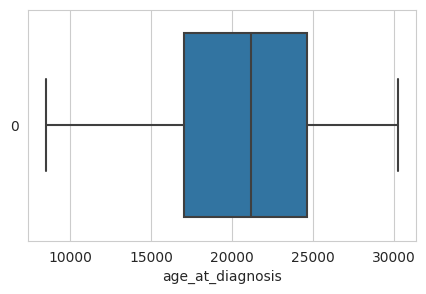

In [1187]:
plt.figure(figsize=(5,3))
sns.boxplot(clinical_info_thinned['age_at_diagnosis'], orient='h')
plt.xlabel('age_at_diagnosis')

In [1188]:
print(f'\033[1mКоэффициент корреляции\033[0m  = ', np.corrcoef(clinical_info_thinned['age_at_diagnosis'], clinical_info_thinned['age_at_index'])[0][1])

Коэффициент корреляции  =  0.9998391198814849


Здесь линейная взаимосвязь присутствует. Думаю, что это признаки действительно скоррелированы.

### days_to_last_follow_up

Видимо количество дней до последнего обследования до попадания в базу (?).

Text(0.5, 0, 'days_to_last_follow_up')

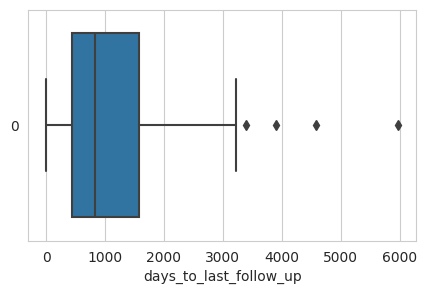

In [1189]:
plt.figure(figsize=(5,3))
sns.boxplot(clinical_info_thinned['days_to_last_follow_up'], orient='h')
plt.xlabel('days_to_last_follow_up')

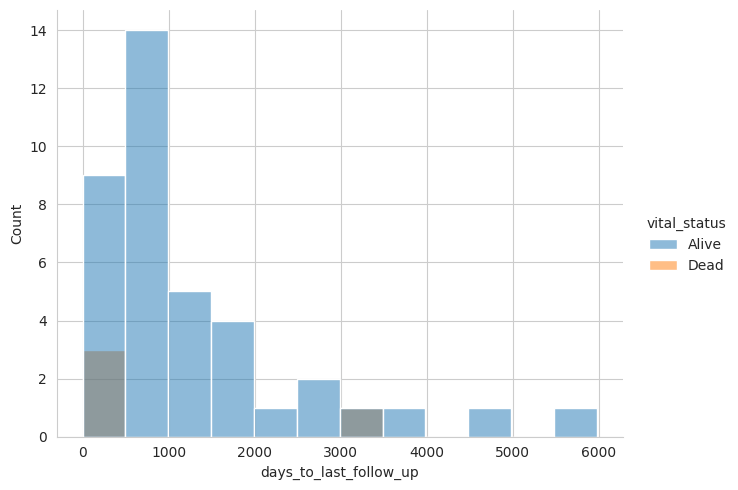

In [1190]:
sns.displot(data=clinical_info_thinned,
            x=clinical_info_thinned['days_to_last_follow_up'],
            legend=True,
            aspect=1.3,
            bins=12,
            hue=clinical_info_thinned['vital_status'],
            kind='hist')

### year_of_dignosis

Видимо год поставновки диагноза

Text(0.5, 0, 'year_of_diagnosis')

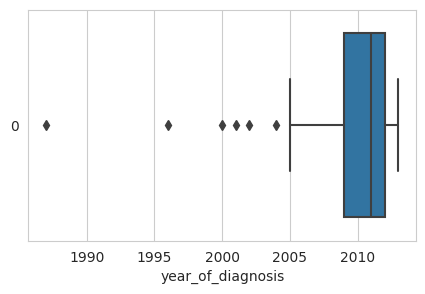

In [1191]:
plt.figure(figsize=(5,3))
sns.boxplot(clinical_info_thinned['year_of_diagnosis'], orient='h')
plt.xlabel('year_of_diagnosis')

In [1192]:
clinical_info_thinned['year_of_diagnosis'].unique()

array([2013., 2011., 2012., 2004., 2010., 2000., 1996., 1987., 2009.,
       2006., 2005., 2001., 2002., 2008.])

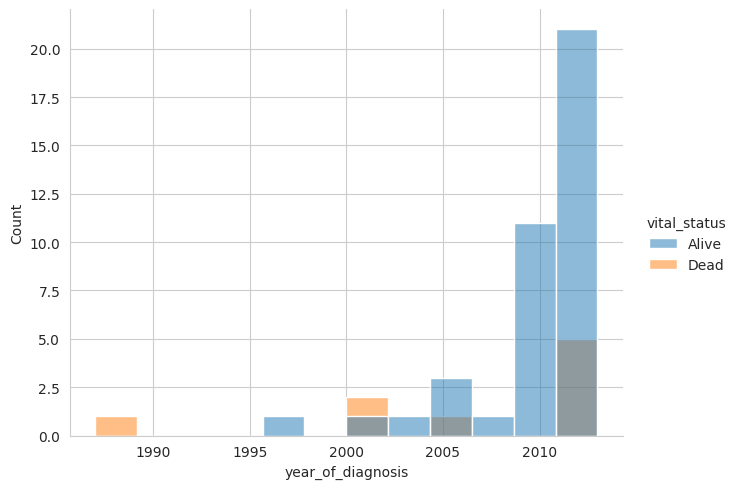

In [1193]:
sns.displot(data=clinical_info_thinned,
            x=clinical_info_thinned['year_of_diagnosis'],
            legend=True,
            aspect=1.3,
            bins=12,
            hue=clinical_info_thinned['vital_status'],
            kind='hist')

### Матрица корреляции

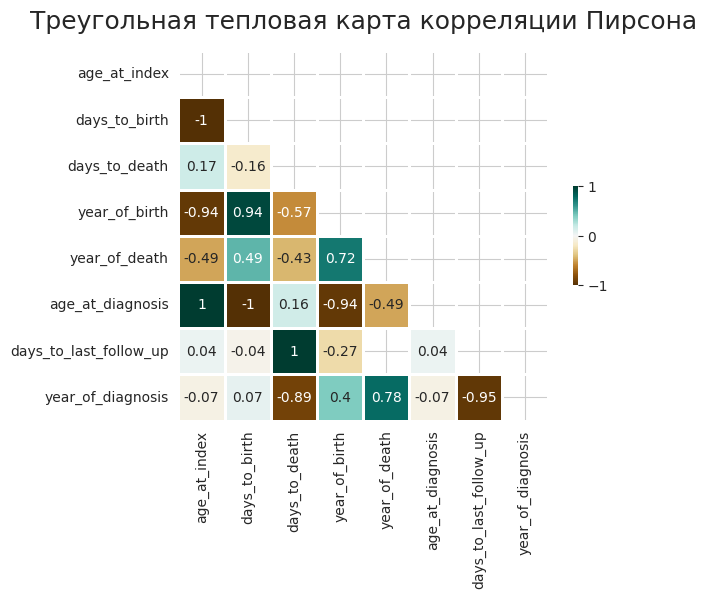

In [1194]:
sns.set_style("whitegrid")

# Воспользуемся функциями np.triu, чтобы изолировать верхний треугольник (np.tril нижний)
# функция np.ones_like() изменит все изолированные значения на 1.
mask = np.triu(np.ones_like(clinical_info_thinned.corr(numeric_only=True), dtype=bool))

heatmap = sns.heatmap(
    clinical_info_thinned.corr(numeric_only=True).round(2),
    annot=True,
    square=True,
    cmap="BrBG",
    cbar_kws={"fraction": 0.01},
    linewidth=1,

    mask=mask,
)

heatmap.set_title(
    "Треугольная тепловая карта корреляции Пирсона", fontdict={"fontsize": 18}, pad=16
);

Очень много возрастных и временных характеристик, многие скоррелированы.

## Категориальные признаки.

In [1195]:
clinical_info_thinned.describe(include='category')

,case_id,ethnicity,gender,race,vital_status,ann_arbor_b_symptoms,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,icd_10_code,prior_treatment,site_of_resection_or_biopsy,tissue_or_organ_of_origin,treatment_Radiation,treatment_Pharmaceutical
count,48,48,48,48,48,46,42,46,48,48,48,48,48,48
unique,48,2,2,3,2,2,4,2,10,2,20,20,3,3
top,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,not hispanic or latino,female,white,Alive,No,Stage II,No,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",No,Yes
freq,1,36,26,29,39,35,17,25,38,47,16,16,40,44


In [1196]:
def show_cat_feat(feat, labels=None, title=None, aspect=1, pie=True, h=6, w=4):
    plt.figure(figsize=(h,w))

    print(f'Наличие пропусков: {clinical_info_thinned[feat].isna().any()}')

    if pie:
        clinical_info_thinned[feat].value_counts().plot.pie(autopct = '%1.3f%%', shadow = True,
                                                            # labels=labels
                                                            ).set(title=title)

    sns.displot(data=clinical_info_thinned,
                x=clinical_info_thinned[feat],
                legend=True,
                aspect=aspect,
                hue=clinical_info_thinned['vital_status'],
                kind='hist')

### ethnicity

Этническая принадлежность.

Наличие пропусков: False


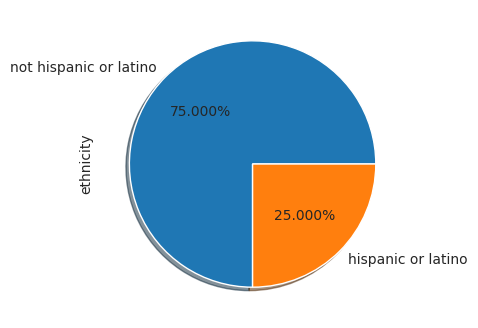

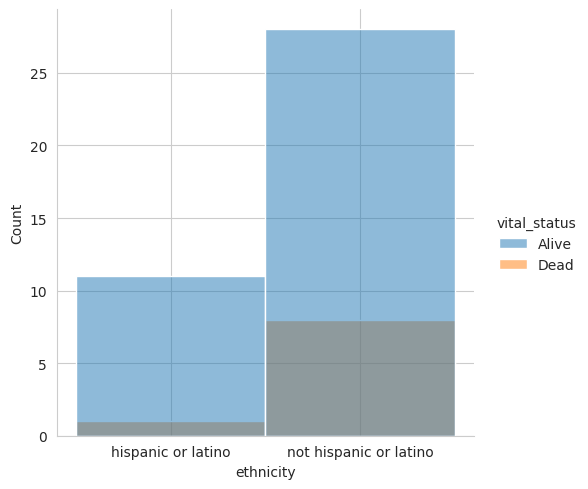

In [1197]:
# labels = ['not hispanic or latino', 'hispanic or latino']
title = "Диаграмма этнической принадлежности"

show_cat_feat('ethnicity', title)

### gender

Наличие пропусков: False


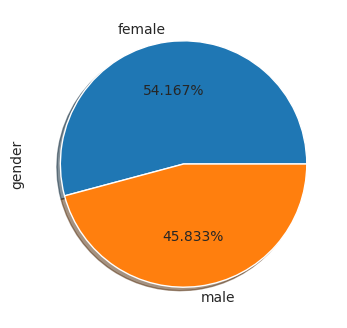

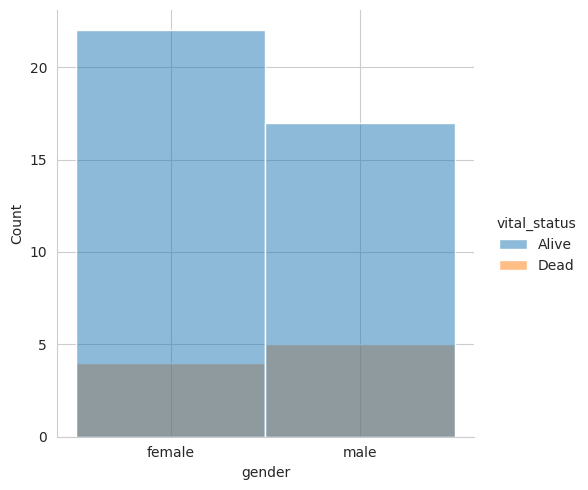

In [1198]:
# labels = ['female', 'male']
title = "Диаграмма гендера"

show_cat_feat('gender', title)

### race

Наличие пропусков: False


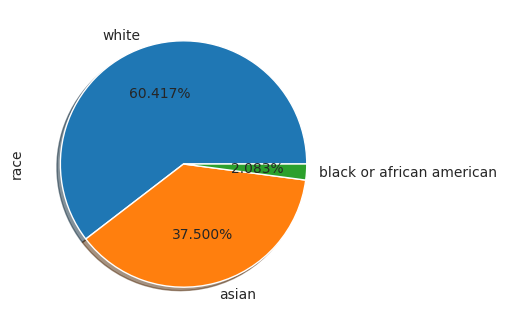

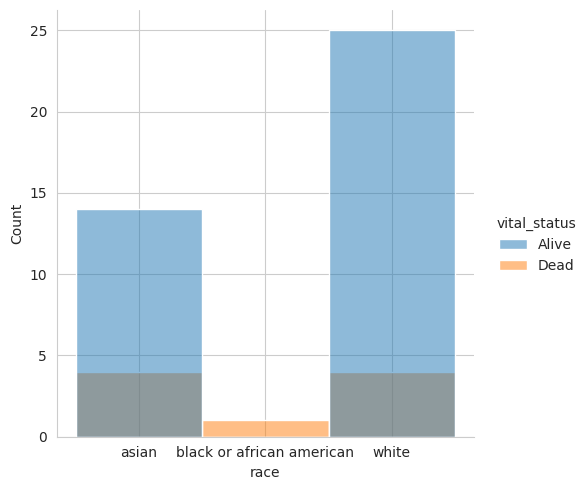

In [1199]:
title = "Диаграмма расового распределения"

show_cat_feat('race', title)

### ann_arbor_b_symptoms

Вероятно наличие симптомов по классификации Анн-Арбора. К сожалению, не врач, сходу не могу точно правильно указать.

Наличие пропусков: True


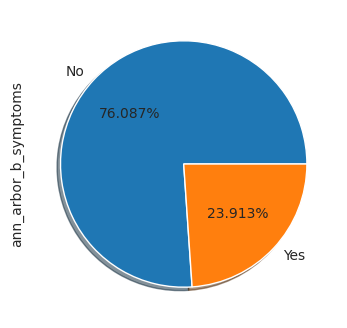

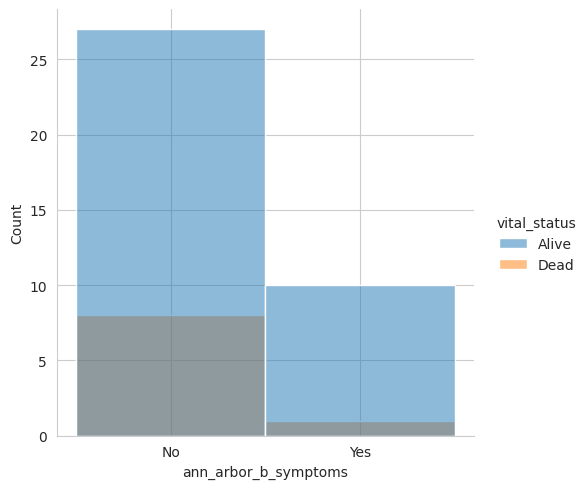

In [1200]:
title = "Наличие симптомов по классификации Анн-Арбора"

show_cat_feat('ann_arbor_b_symptoms', title)

### ann_arbor_clinical_stage

Наличие пропусков: True


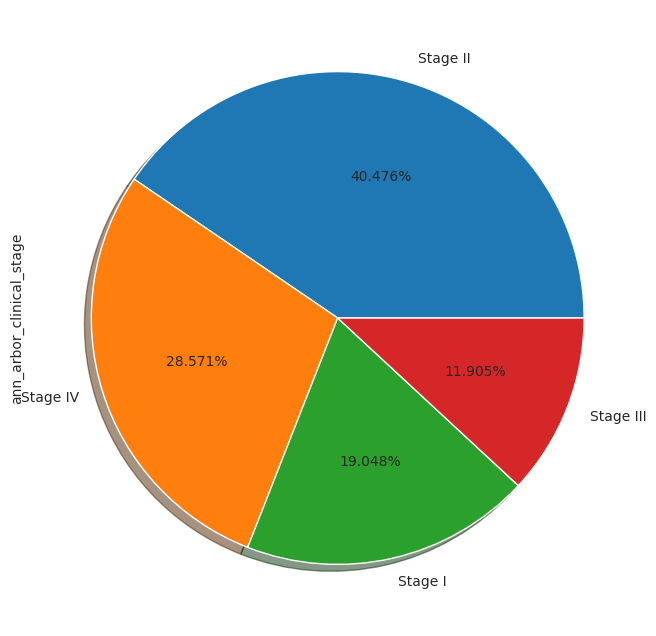

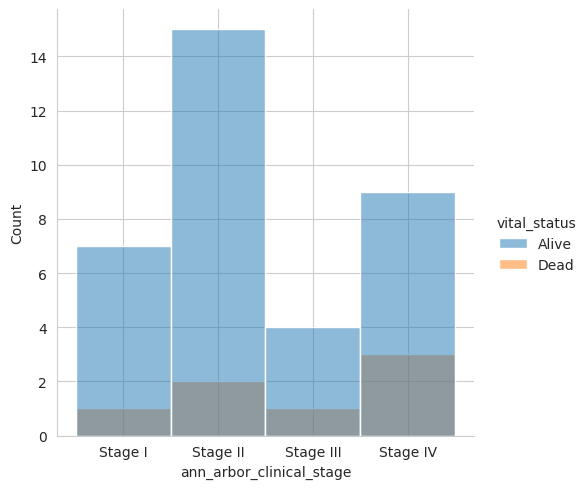

In [1201]:
title = "Клиническая стадия"

show_cat_feat('ann_arbor_clinical_stage', title, h=10, w=8)

### ann_arbor_extranodal_involvement

Наличие пропусков: True


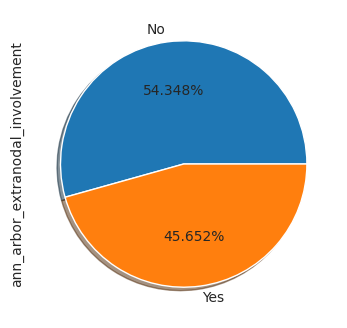

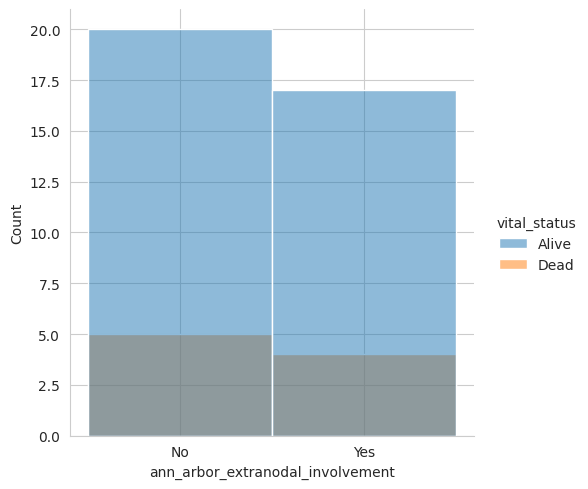

In [1202]:
title = "Экстранодальное поражение"

show_cat_feat('ann_arbor_extranodal_involvement', title)

### icd_10_code

Наличие пропусков: False


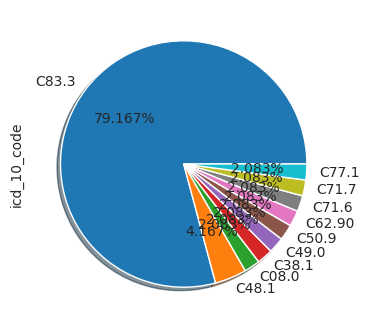

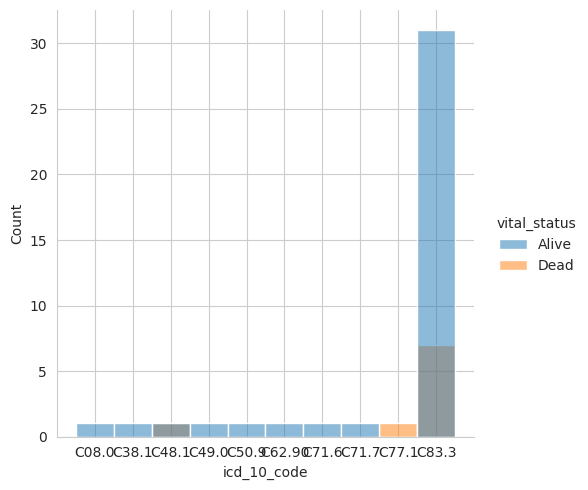

In [1203]:
title = "Кодировка"

show_cat_feat('icd_10_code', title)

### prior_treatment

Наличие пропусков: False


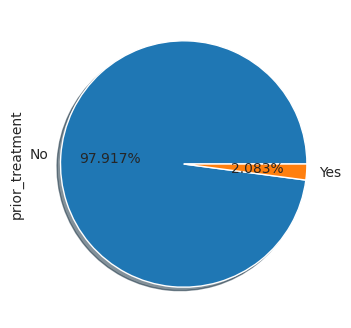

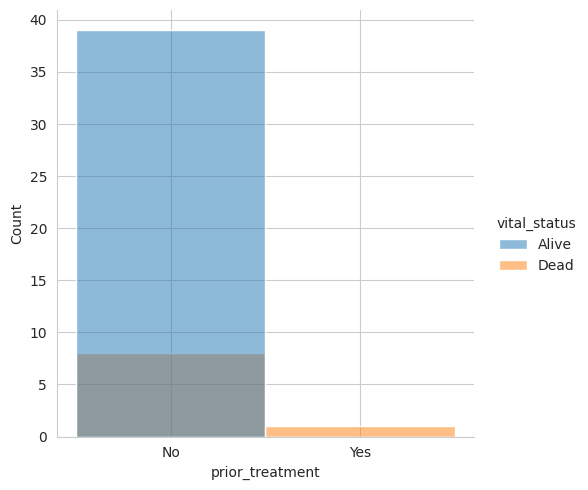

In [1204]:
title = "Предшествующее лечение"

show_cat_feat('prior_treatment', title)

### site_of_resection_or_biopsy

Решил не отображать графики, т.к. посчитал, что это не столь информативно для нашей предполагаемой целевой переменной.

In [1205]:
# title = "Место резекции или биопсии"

# show_cat_feat('site_of_resection_or_biopsy', title, pie=False, aspect=6)

### tissue_or_organ_of_origin

Решил не отображать графики, т.к. посчитал, что это не столь информативно для нашей предполагаемой целевой переменной.

In [1206]:
# title = "ткань или орган происхождения"

# show_cat_feat('tissue_or_organ_of_origin', title, pie=False, aspect=6)

### treatment_Radiation

Наличие пропусков: False


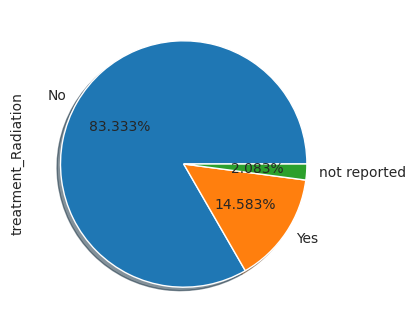

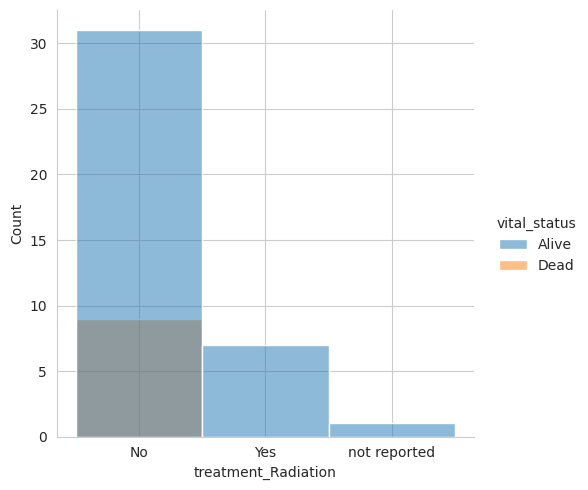

In [1207]:
title = "Лучевая терапия"

show_cat_feat('treatment_Radiation', title, pie=True)

### treatment_Pharmaceutical

Наличие пропусков: False


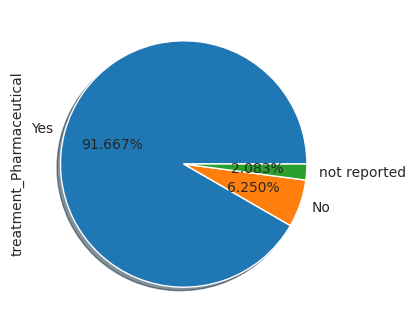

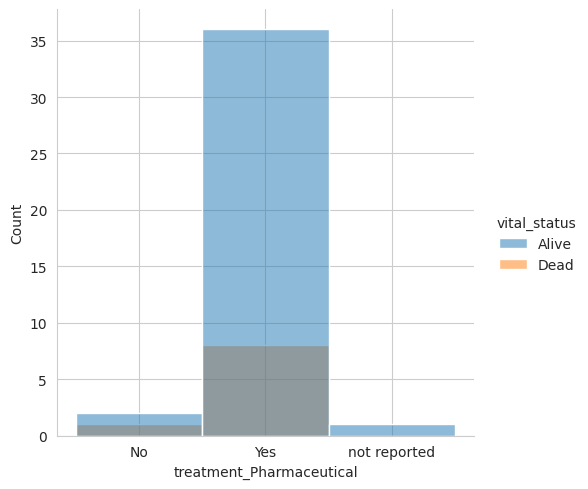

In [1208]:
title = "Фармацевтическое лечение"

show_cat_feat('treatment_Pharmaceutical', title, pie=True)

## vital_status

[Text(0.5, 1.0, 'Жизненное состояние')]

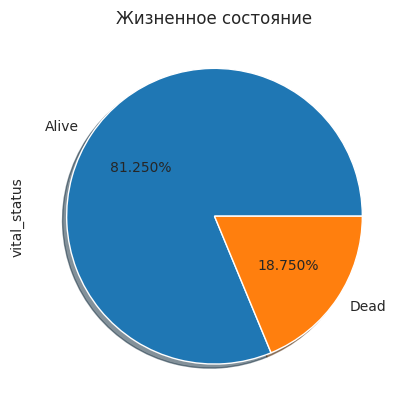

In [1209]:
title = 'Жизненное состояние'

clinical_info_thinned['vital_status'].value_counts().plot.pie(autopct = '%1.3f%%', shadow=True,
                                                            # labels=labels
                                                            ).set(title=title)